<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana4/1%20Simulaci%C3%B3n_Agujas_de_Buffon_probabilidad_geom%C3%A9trica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from  math import sin, cos
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

En la simulación de este notebook, se considera  que el tamaño de las agujas y la distancia entre las lineas del tapete es 1.

El código está inspirado en la propuesta de S.Hunter planteada en [este repositorio](https://github.com/samuelyhunter/Buffon/blob/master/buffon.py)


<center><img src='https://mste.illinois.edu/activity/buffon/situation.png'>

La probabilidad de que una aguja cruce la linea se resuelve mediane el calculo del área bajo la curva de la función $(1/2)sen(\theta)$

<center><img src='https://mste.illinois.edu/activity/buffon/function.png'>

Esta integral da por resultado 1, que si lo dividimos entre el rectangulo con área $\pi/2$, obtenemos que
$$P(cruce)=2/\pi$$



# Funciones

In [2]:
def lanza_agujas(n):
    l = 1
    l_cuadrado = 10

    x = np.random.uniform(0, l_cuadrado, n) # coordenada x del centro de la aguja
    y = np.random.uniform(0, l_cuadrado, n) # cordenada y del centro del aguja
    𝜃 = np.random.uniform(0, np.pi, n) # angulo de rotación de la aguja en radianes, entre 0 y pi (180 grados)

    # Calcula coordenadas extremos (P1 y P2)
    x1 = x - (1/2 * np.cos(𝜃))
    y1 = y - (1/2 * np.sin(𝜃))

    x2 = x + (1/2 * np.cos(𝜃))
    y2 = y + (1/2 * np.sin(𝜃))

    # ¿Cruza alguna de las lineas del tapete?
    cruza = np.where(np.floor(y1) != np.floor(y2), 1, 0)    # np.floor(3.76) = 3


    df = pd.DataFrame({'x_centro':x, 'y_centro':y, '𝜃':𝜃,
                       'x1': x1,      'y1': y1,
                       'x2': x2,      'y2': y2,
                       'cruza':cruza
                      })

    return df

In [3]:
def AgujasDeBuffon(n):
        df = lanza_agujas(n)
        pi_est = 2/df['cruza'].mean()
        titulo = 'Simulación Agujas de Buffon'
        subtitulo = 'Estimación de pi: {} \ncon {} lanzamientos'.format(pi_est, n)

        fig = plt.figure(figsize=(8, 8))
        fig.suptitle(titulo, size=16, ha='center')
        gr = plt.subplot()
        gr.set_title(subtitulo, style='italic', size=11, pad=5)
        gr.set_xlim(-0.5, 10.5)
        gr.set_ylim(-0.5, 10.5)
        plt.gca().set_aspect('equal')   # para que la escala de los ejes se visualice igual

        # dibuja lineas horizontales en el tapete
        for j in range(11) :
            gr.hlines(y=j, xmin=0, xmax=10,
                      color="black", linestyle='--', linewidth=2.0)

        # dibuja cada aguja lanzada
        for i in range(len(df)):
            if df.loc[i, 'cruza']==1:
                gr.plot(df.loc[i,['x1', 'x2']], df.loc[i,['y1', 'y2']], color='orange', linewidth=1.3 )
            else:
                gr.plot(df.loc[i,['x1', 'x2']], df.loc[i,['y1', 'y2']], color='blue', linewidth=1.3)



# Dearrollo

In [8]:
df = lanza_agujas(350)
df.head()

,x_centro,y_centro,𝜃,x1,y1,x2,y2,cruza
0,3.963339,7.781444,0.409805,3.504740,7.582228,4.421938,7.980659,0
1,1.758396,7.520062,0.866324,1.434580,7.139086,2.082212,7.901039,0
2,6.549839,2.293877,1.909083,6.715774,1.822215,6.383903,2.765540,1
3,5.730395,7.707952,2.721214,6.186862,7.503899,5.273928,7.912006,0
4,3.613235,9.509191,1.842381,3.747364,9.027518,3.479106,9.990865,0


$$P(cruce)=2/\pi$$



In [9]:
# Valor Esperado
2/np.pi

0.6366197723675814

In [10]:
# Media de los lanzamientos
df['cruza'].mean()

0.6514285714285715

In [14]:
# Valor de pi estimado
2/df['cruza'].mean()

3.070175438596491

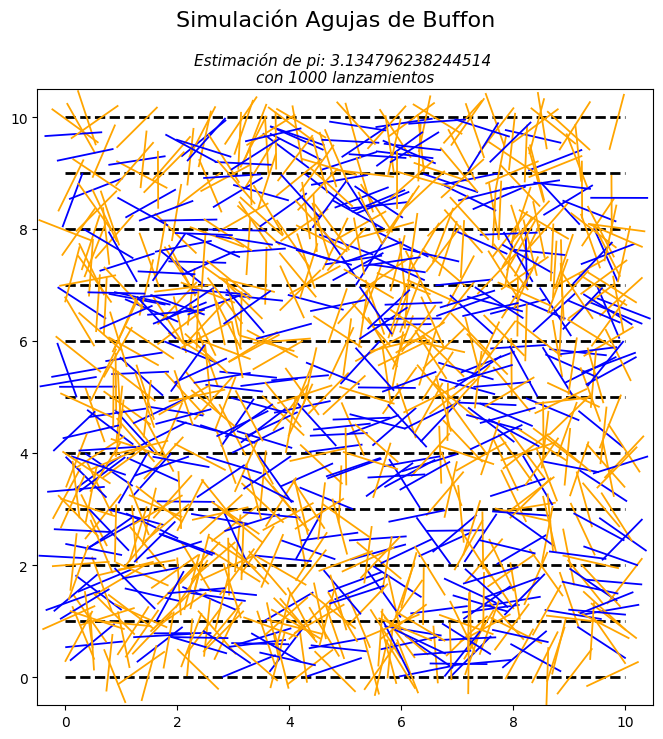

In [7]:
AgujasDeBuffon(1000)

#Referncias:
- [1] S. Hunter, «Buffon». 31 de mayo de 2021. Accedido: 11 de agosto de 2022. [En línea]. Disponible en: https://github.com/samuelyhunter/Buffon/blob/ddc513647864748ae64c3a92538a10d2196388f1/buffon.py


- [2] «Buffon’s Needle, MSTE, University of Illinois». https://mste.illinois.edu/activity/buffon/ (accedido 11 de agosto de 2022).
